In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import tensorflow as tf

In [39]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [41]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train, epochs=5)
model.save('handwritten_recognition.model')

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2629 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1090 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0740 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0542 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0416 - accuracy: 0.9865


INFO:tensorflow:Assets written to: handwritten_recognition.model\assets


INFO:tensorflow:Assets written to: handwritten_recognition.model\assets


In [43]:
model = tf.keras.models.load_model('handwritten_recognition.model')
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss = ', loss)
print('Accuracy = ', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9740
Loss =  0.09186926484107971
Accuracy =  0.9739999771118164


1/1 [==============================] - 0s 90ms/step
This digit is probably = 2


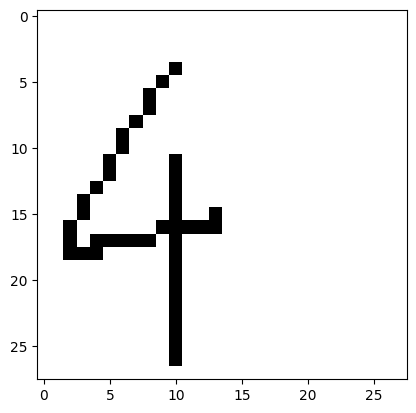

1/1 [==============================] - 0s 25ms/step
This digit is probably = 5


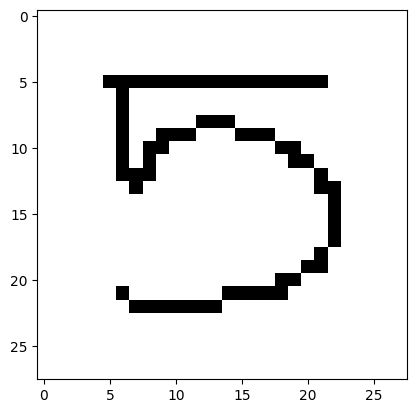

1/1 [==============================] - 0s 24ms/step
This digit is probably = 6


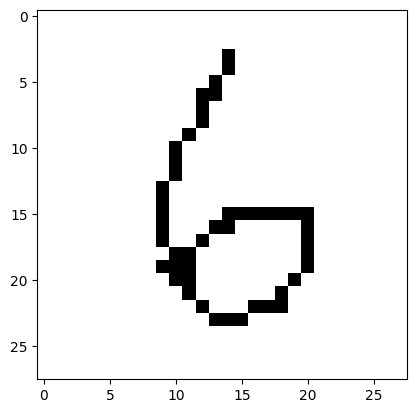

1/1 [==============================] - 0s 32ms/step
This digit is probably = 7


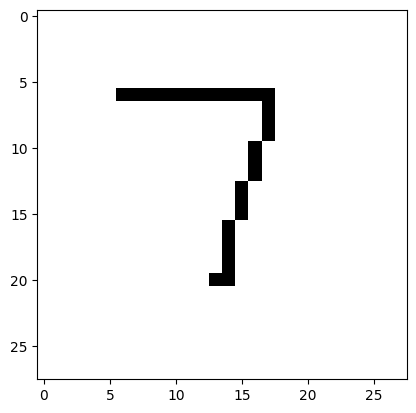

In [44]:
model = tf.keras.models.load_model('handwritten_recognition.model')

image_num = 4
while os.path.isfile(f"digits/digit{image_num}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_num}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably = {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print('Error')
    finally:
        image_num += 1